# Clusters K-means

*by Lena Nikolenko*

In [23]:
# Import the main modules and set the styles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.color_palette('Set2')

# Import sklearn libraries for machine learning
from sklearn.cluster import KMeans

In [24]:
#Initiate the data
colnames=['X', 'Y', 'Z'] 
df=pd.read_csv('clusters.csv',names=colnames, header=None)
df=pd.DataFrame(df)

In [25]:
df.head()

,X,Y,Z
0,2.153873,0.852657,3.629511
1,4.645254,1.124013,0.430478
2,2.662009,4.158811,4.432399
3,2.305839,1.723325,-0.682017
4,0.891654,1.292308,5.189337


Text(0.5, 0, 'Z')

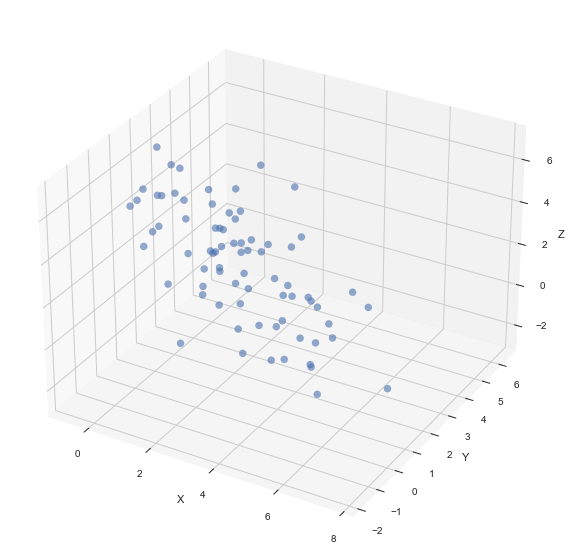

In [26]:
# Visualizing data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x=df['X']
y=df['Y']
z=df['Z']

ax.scatter(x, y, z, s=50, alpha=0.6, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

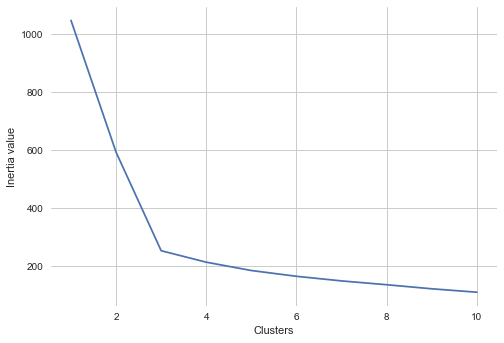

In [27]:
#Elbow method to find optimal amount of clusters
inertia_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

#Plot elbow curve
plt.plot(np.arange(1,11),inertia_list)
plt.xlabel('Clusters')
plt.ylabel('Inertia value')
plt.show()

In [28]:
#Building the model
kmeans_optimum = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
clusters = kmeans_optimum.fit_predict(df)

In [29]:
#Checking the centers of clusters
centers = kmeans_optimum.cluster_centers_
centers

array([[ 1.08892771,  1.32032222,  4.88003527],
       [ 0.80200686,  4.07168051, -0.07854087],
       [ 5.22555132,  0.58692529,  1.28219944]])

In [18]:
#Adding extra column indicating the cluster number for each point
df['Cluster'] = clusters

#Naming different groups of vectors
clusters_1 = df[df.Cluster==0]
clusters_2 = df[df.Cluster==1]
clusters_3 = df[df.Cluster==2]

In [19]:
df.head()

,X,Y,Z,Cluster
0,2.153873,0.852657,3.629511,1
1,4.645254,1.124013,0.430478,2
2,2.662009,4.158811,4.432399,1
3,2.305839,1.723325,-0.682017,0
4,0.891654,1.292308,5.189337,1


Text(0.5, 0, 'Z')

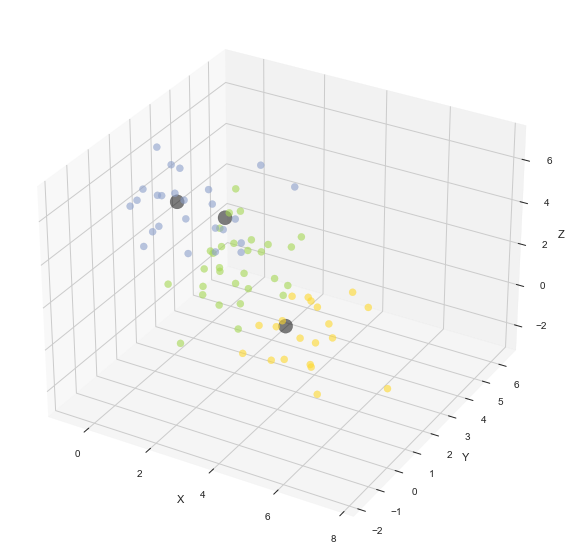

In [20]:
# Visualizing clusters and centroids

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x= df['X']
y= df['Y']
z= df['Z']
dict_colors = {0: '#a6d854', 1:'#8da0cb', 2: '#ffd92f'}
colors = list(map(lambda x: dict_colors[x], df['Cluster'] ))

ax.scatter(x, y, z, s=50, alpha=0.6, marker='o', c=colors)
ax.scatter(centers[0,:], centers[1,:],centers[2,:], c='black', s=200, alpha=0.5);

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')